In [1]:
# importing the essentials libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator       # for analysing the data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax

In [2]:
# setting the train data path
train_data = './train/'      

# setting the test data path
test_data = './validation/'


In [3]:
# All the size of the images should be same
img_width , img_height = 150,150

In [4]:
# labels presents
labels = ['cats','dogs']

In [5]:
# changing the images rescaling hortizontal_flip etc so that our train data is diverse

train_gen = ImageDataGenerator(rescale=1/255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

# we shouldn't do with test data 
test_gen = ImageDataGenerator(rescale=1./255)



In [6]:
# reading the images from the folders

train = train_gen.flow_from_directory(train_data,target_size=(img_height,img_width),classes=labels,class_mode='binary',batch_size=32)
test = test_gen.flow_from_directory(test_data,target_size=(img_height,img_width),classes=labels,class_mode='binary',batch_size=32)


Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [7]:
# developing our model. Customizing our CNN

model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
# Compiling the model 

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
epochs = 10

In [10]:
model.fit(train,epochs=epochs,verbose=2)

Epoch 1/10
63/63 - 210s - loss: 0.6968 - accuracy: 0.5085 - 210s/epoch - 3s/step
Epoch 2/10
63/63 - 188s - loss: 0.6835 - accuracy: 0.5650 - 188s/epoch - 3s/step
Epoch 3/10
63/63 - 184s - loss: 0.6611 - accuracy: 0.6180 - 184s/epoch - 3s/step
Epoch 4/10
63/63 - 185s - loss: 0.6280 - accuracy: 0.6570 - 185s/epoch - 3s/step
Epoch 5/10
63/63 - 177s - loss: 0.6190 - accuracy: 0.6600 - 177s/epoch - 3s/step
Epoch 6/10
63/63 - 179s - loss: 0.5862 - accuracy: 0.7025 - 179s/epoch - 3s/step
Epoch 7/10
63/63 - 178s - loss: 0.5658 - accuracy: 0.7110 - 178s/epoch - 3s/step
Epoch 8/10
63/63 - 178s - loss: 0.5463 - accuracy: 0.7245 - 178s/epoch - 3s/step
Epoch 9/10
63/63 - 99s - loss: 0.5443 - accuracy: 0.7195 - 99s/epoch - 2s/step
Epoch 10/10
63/63 - 102s - loss: 0.5399 - accuracy: 0.7215 - 102s/epoch - 2s/step


In [12]:
train_loss = model.history.history['loss']

In [13]:
train_acc = model.history.history['accuracy']

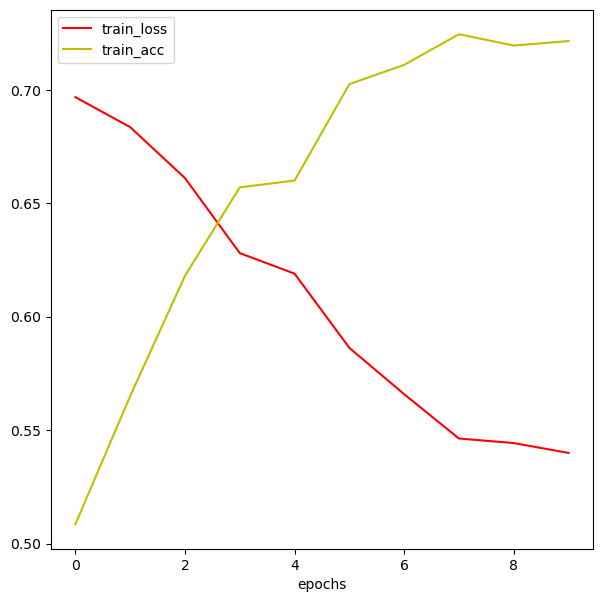

In [14]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(epochs ),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs),train_acc,color='y',label='train_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

In [15]:
# Testing the model on test data

test_loss , test_acc = model.evaluate(test)

26/26 [==============================] - 11s 414ms/step - loss: 0.5705 - accuracy: 0.7219


In [16]:
print(test_loss)
print(test_acc)

0.5704678893089294
0.7219451665878296


In [17]:
# function for making our predictions

def fun(img):
    imgs = image.load_img(img,target_size=(img_width,img_height))
    plt.imshow(imgs)
    img_arr = image.img_to_array(imgs)
    print(img_arr.shape)
    print('------------------------>')
    a = np.expand_dims(img_arr,axis=0)  # rows 
    print(a.shape)
    print('------------->')
    result = model.predict(a)
    print("result = ",result)
    print('----------------------')
    c = model.predict(a)
    print('classes = ',model.predict(a))
    if c[0] > 0.5:
        print("res = ",'dog')
    else:
        print('res = ','cat')

(150, 150, 3)
------------------------>
(1, 150, 150, 3)
------------->
1/1 [==============================] - 0s 224ms/step
result =  [[0.]]
----------------------
1/1 [==============================] - 0s 53ms/step
classes =  [[0.]]
res =  cat


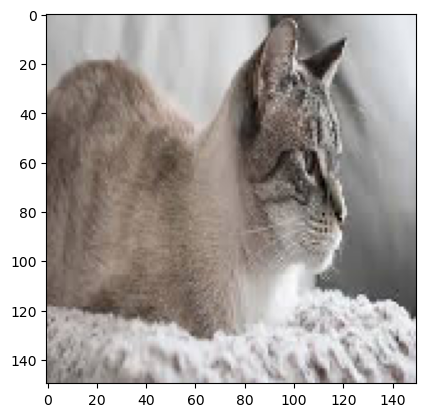

In [18]:
fun('./images (1).jpg')

(150, 150, 3)
------------------------>
(1, 150, 150, 3)
------------->
1/1 [==============================] - 0s 43ms/step
result =  [[1.]]
----------------------
1/1 [==============================] - 0s 50ms/step
classes =  [[1.]]
res =  dog


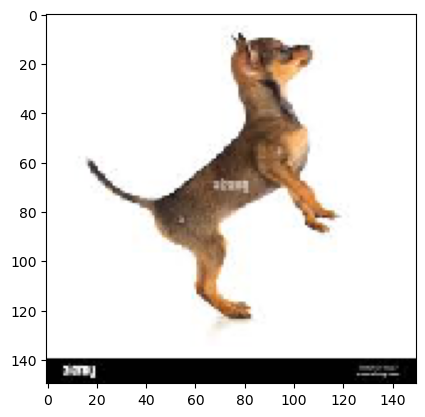

In [19]:
fun('./download.jpg')

(150, 150, 3)
------------------------>
(1, 150, 150, 3)
------------->
1/1 [==============================] - 0s 56ms/step
result =  [[1.]]
----------------------
1/1 [==============================] - 0s 55ms/step
classes =  [[1.]]
res =  dog


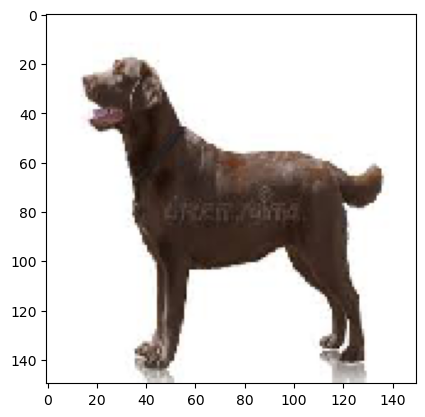

In [20]:
fun('./download (1).jpg')

(150, 150, 3)
------------------------>
(1, 150, 150, 3)
------------->
1/1 [==============================] - 0s 48ms/step
result =  [[1.]]
----------------------
1/1 [==============================] - 0s 52ms/step
classes =  [[1.]]
res =  dog


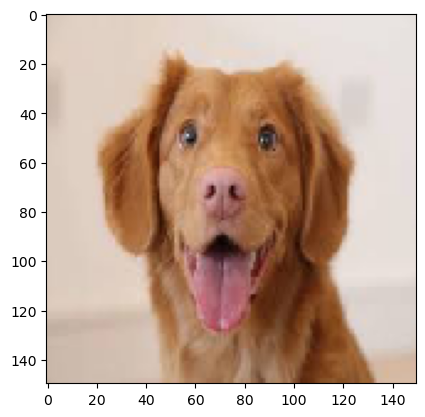

In [21]:
fun('./download (2).jpg')